In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import import_ipynb
import sys
from sklearn.model_selection import KFold
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean accuracy: 97.15918619973645
Mean Precision: 97.16687553306818
Mean Recall: 97.15918619973645
MeanF1-score: 97.15914363390738


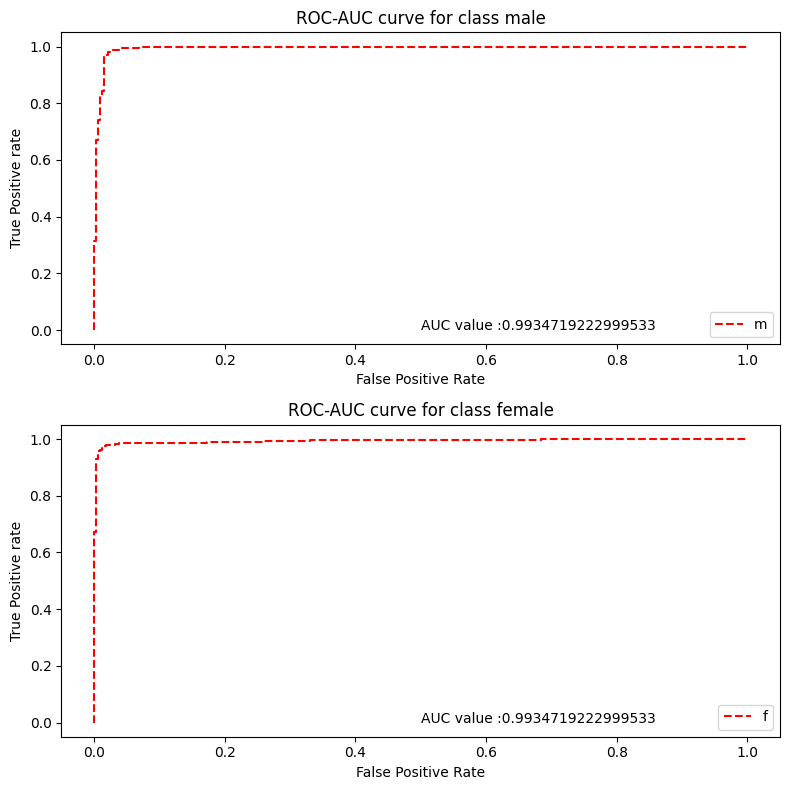

In [11]:
%run '/content/drive/MyDrive/ML_PROJECT/src/Logistic_Regression_Model.ipynb'

Based upon the Correlation b/w variou columns, we separated Highly correlated columns.

In [12]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/voice.csv')

In [13]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
def select_features(data_set):
    removed_column = 'centroid, skew, maxdom, dfrange, maxfun, meandom, mindom'.split(', ')
    data_set = data_set.drop(removed_column, axis=1)
    x = data_set.drop('label',axis=1)
    y = data_set['label']
    return data_set, x, y

selected_df, x, y = select_features(df)
print(x.columns.size)

13


In [15]:
selected_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.208274,male


In [17]:
selected_df.to_csv('/content/drive/MyDrive/ML_PROJECT/assests/feature_selected_voice_data.csv', index=False)

In [ ]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.208274


In [18]:
x = (x - x.mean())/x.std()

In [ ]:
k = 10
i = 0
k_fold = KFold(n_splits=k)

mean_stats = np.zeros(4)

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    stats = perform_logistic_regression(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
    mean_stats = mean_stats + stats

mean_stats = mean_stats / k

print(f"Mean accuracy: {mean_stats[0]}")
print(f"Mean Precision: {mean_stats[1]}")
print(f"Mean Recall: {mean_stats[2]}")
print(f"Mean F1-score: {mean_stats[3]}")

Mean accuracy: 0.9608553288344048
Mean Precision: 0.9998422712933754
Mean Recall: 0.9608553288344048
Mean F1-score: 0.9796849706370324
